# Bir boyutlu potansiyeller

## Sonlu kuyu potansiyelinin incelenmesi

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from IPython.display import Math
init_printing()

In [2]:
x = symbols('x', real=True)
hbar, m = symbols('hbar, m', real=True, positive=True)
En, V_0, k, q = symbols('En, V_0, k, q', real=True, positive=True)
a = symbols('a', real=True, positive=True)
A, B, R, T = symbols('A, B, R, T')

u = Function('u')
V = Function('V')

mprint = lambda X: display(Math(X))
lprint = lambda X, F: display(Math(X + latex(F)))
rprint = lambda F, X: display(Math(latex(F) + X))
eprint = lambda F1, X, F2: display(Math(latex(F1) + X + latex(F2) ))
pprint = lambda F, X: display(Math(X.join([latex(f) for f in F])))

In [3]:
eq = diff(u(x), x, x) + k**2 * u(x)
sol = dsolve(eq)

rprint(eq, "= 0")
display(sol)

<IPython.core.display.Math object>

In [4]:
u = Function('u')

j = lambda x: hbar/(2*I*m)*(conjugate(u(x)) * diff(u(x),x) - conjugate(diff(u(x),x))*u(x))
lprint("j(x) = ", simplify(j(x)))

<IPython.core.display.Math object>

In [5]:
u1 = lambda x: exp(I*k*x) + R*exp(-I*k*x)
mprint("x<-a")
lprint("u(x) = ", u1(x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
u = u1
j1 = simplify(expand(j(x)))
lprint("j(x) = ", j1)

<IPython.core.display.Math object>

In [7]:
u2 = lambda x: A*exp(I*q*x) + B*exp(-I*q*x)
mprint("-a<x<a")
lprint("u(x) = ", u2(x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
u = u2
j2 = Abs(simplify(expand(j(x))))
lprint("j(x) = ", j2)

<IPython.core.display.Math object>

In [9]:
u3 = lambda x: T*exp(I*k*x)
mprint("x>a")
display(Math("u(x) = "+ latex(u3(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
u = u3
j3 = Abs(expand(j(x)))
lprint("j(x) = ", j3)

<IPython.core.display.Math object>

### Korunum ilkesinden

In [11]:
pprint(["j_1", "j_2", "j_3"], "=")
pprint([j1,j2,j3], "=")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Dalga fonksiyonunun sürekliliğinden

In [12]:
mprint("u_1(-a) = u_2(-a)")
mprint("u_2(a) = u_3(a)")
eprint(u1(-a), "=" ,u2(-a))
eprint(u2(a), "=" ,u3(a))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Türevlerin sürekliliğinden

In [13]:
du1 = lambda x0: simplify(diff(u1(x), x).subs(x, x0))
du2 = lambda x0: simplify(diff(u2(x), x).subs(x, x0))
du3 = lambda x0: simplify(diff(u3(x), x).subs(x, x0))

lprint("\\frac{d u_1(x)}{dx}= ", du1(x))
lprint("\\frac{d u_2(x)}{dx} = ", du2(x))
lprint("\\frac{d u_3(x)}{dx}= ", du3(x))

mprint("\\frac{d u_1(x)}{dx}\\bigg|_{x=-a} = \\frac{d u_2(x)}{dx}\\bigg|_{x=-a}")
mprint("\\frac{d u_2(x)}{dx}\\bigg|_{x=a} = \\frac{d u_3(x)}{dx}\\bigg|_{x=a}")
eprint(du1(-a),"=",du2(-a))
eprint(du2(a),"=",du3(a))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Süreklilik şartlarından elde edilen eşitlikler

In [14]:
eprint(u1(-a), "=" ,u2(-a))
eprint(u2(a), "=" ,u3(a))
eprint(du1(-a),"=",du2(-a))
eprint(du2(a),"=",du3(a))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Süreklilik şartlarının oranlarıda birbirine eşit olmalıdır

In [15]:
u1ma = du1(-a)/u1(-a)
u2ma = du2(-a)/u2(-a)
u2pa = du2(a)/u2(a)
u3pa = du3(a)/u3(a)

mprint("x = -a")
mprint("\\frac{1}{u_1(x)}\\frac{d u_1(x)}{dx}\\bigg|_{x=-a} = \\frac{1}{u_2(x)}\\frac{d u_2(x)}{dx}\\bigg|_{x=-a}")
eprint(u1ma,"=" , u2ma)

mprint("x = a")
mprint("\\frac{1}{u_2(x)}\\frac{d u_2(x)}{dx}\\bigg|_{x=a} = \\frac{1}{u_3(x)}\\frac{d u_3(x)}{dx}\\bigg|_{x=a}")
eprint(u2pa,"=" , u3pa)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### A ve B yok edilip önce R bulunabilir

In [16]:
solA1 = solve(u1ma-u2ma, A)[0]/B
solA2 = solve(u2pa-u3pa, A)[0]/B

lprint("A/B = ", solA1)
lprint("A/B = ", solA2)
mprint("A/B - A/B = %s = 0"%latex(solA1-solA2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
solR = solve(solA1-solA2, R)[0]
solRn = sqf(numer(solR), k)
solRd = factor(denom(solR))
solR = solRn/solRd
lprint("R=", solR)

<IPython.core.display.Math object>

### A ve B katsayıları R ve aşağıdaki eşitlikler ile hesaplanabilir

In [18]:
eprint(u1(-a), "=" ,u2(-a))
lprint("A/B = ", solA2)

solB_raw = A/solA2
lprint("B = ", solB_raw)

solA = solve((u1(-a) - u2(-a)).subs({B: solB_raw, R:solR}), A)[0]
solB = solB_raw.subs({A:solA})
lprint("A = ", solA)
lprint("B = ", solB)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### T'de aşağıdaki eşitlikten bulunabilir

In [19]:
eprint(u2(a), "=" ,u3(a))

solT = solve((u2(a) - u3(a)).subs({A: solA, B:solB}), T)[0]
lprint("T = ", solT)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### A, B, R ve T için çözümler aşağıdaki gibi olur

In [20]:
lprint("A = ", solA)
lprint("B = ", solB)
lprint("R = ", solR)
lprint("T = ", solT)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Yansıma (R) ve geçiş (T) akıları

In [21]:
jR = hbar*k/m * simplify(solR*conjugate(solR))
jT = hbar*k/m * simplify(solT*conjugate(solT))
lprint("j_R =", jR)
lprint("j_T =", jT)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Yansıma (R) ve geçiş (T) akıları: $E$ ve $V_0$ cinsinden

In [22]:
prms = {q:hbar**2/(2*m) * (En+V_0), k:hbar**2/(2*m) * En}
jRe = simplify(jR.subs(prms))
jTe = simplify(jT.subs(prms))
lprint("j_R =", jRe)
lprint("j_T =", jTe)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### $x = E/V_0$ değişken dönüşümü

In [23]:
prms = {En:x*V_0, V_0:En/x}
jRx = simplify(jRe.subs(prms))
jTx = simplify(jTe.subs(prms))
lprint("j_R =", jRx)
lprint("j_T =", jTx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### $E/V_0 \geq 1$ için olasılık akılarının grafikleri

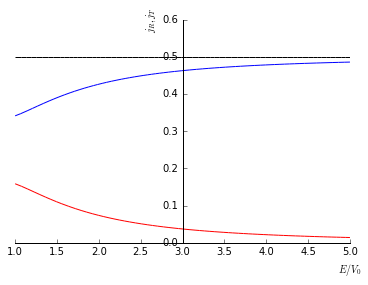

In [24]:
prms = {hbar:1, m:1, En:1, a:1}
jRxs = jRx.subs(prms)
jTxs = jTx.subs(prms)

pl = [jRxs, jTxs, jRxs + jTxs, (x, 1 , 5)]
p = plot(*pl, xlabel="$E/V_0$", ylabel= "$j_R, j_T$", show=False)
p[0].line_color="red"
p[1].line_color="blue"
p[2].line_color="black"

p.show()

### Yukarıdaki grafiğin *Matplotlib* ve *NumPy* kütüphaneleri ile çizimi

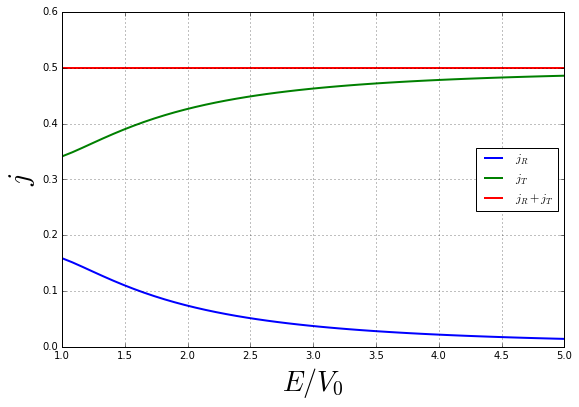

In [25]:
prms = {hbar:1, m:1, En:1, a:1}
xnp = np.linspace(1, 5)


jRxs = lambdify(x, jRx.subs(prms))
jTxs = lambdify(x, jTx.subs(prms))

plt.figure(figsize=(9, 6))
plt.plot(xnp, np.real(jRxs(xnp)), label="$j_R$",lw=2)
plt.plot(xnp, np.real(jTxs(xnp)), label="$j_T$", lw=2)
plt.plot(xnp, np.real(jRxs(xnp)+jTxs(xnp)), label="$j_R + j_T$", lw=2)

plt.xlabel("$E/V_0$", fontsize=28)
plt.ylabel("$j$", fontsize=28)
plt.legend(loc="best")
plt.grid()
plt.show()

### Dalga fonksiyonlarının reel kısımlarının çizimi

In [26]:
u1s = u1(x).subs({R:solR})
u2s = u2(x).subs({A:solA, B:solB})
u3s = u3(x).subs({T:solT})

mprint("x<-a")
lprint("u_1(x) = ", u1s)
mprint("-a<x<a")
lprint("u_2(x) = ", u2s)
mprint("a<x")
lprint("u_3(x) = ", u3s)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Dalga fonksiyonlarının $E$ ve $V_0$ ile tekrar yazımı

In [27]:
prms = {q:hbar**2/(2*m) * (En+V_0), k:hbar**2/(2*m) * En}

u1e = u1s.subs(prms)
u2e = u2s.subs(prms)
u3e = u3s.subs(prms)

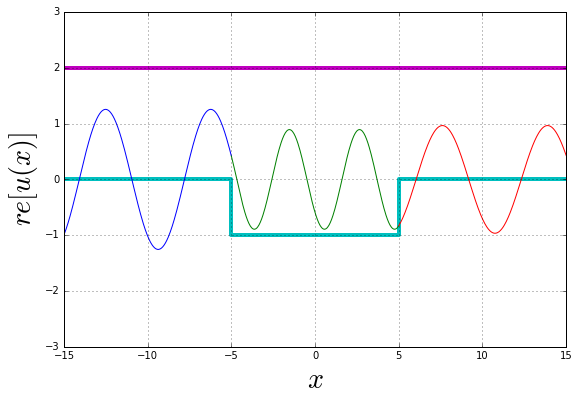

In [28]:
a0 = 5    # [-a, +a] kuyunun sınırları
xoo = 15  # x uzayının pratik sonsuzu
En0 = 2   # parçacığın gelme enerjisi
V_00 = 1  # kuyunun derinliği
nx = 250 # x uzayının bölünme (dx'lerin) sayısı 

prms = {En:En0, V_0:V_00, a:a0, hbar:1, m:1}
xnp1 = np.linspace(-xoo, -a0, nx)
xnp2 = np.linspace(-a0, a0, nx)
xnp3 = np.linspace(a0, xoo, nx)

u1re = re(u1e.subs(prms))
u1np = lambdify(x, u1re)

u2re = re(u2e.subs(prms))
u2np = lambdify(x, u2re)

u3re = re(u3e.subs(prms))
u3np = lambdify(x, u3re)

# çizimin büyüklüğü
plt.figure(figsize=(9, 6))

# dalga fonksiyonlarını
plt.plot(xnp1, np.real(u1np(xnp1)))
plt.plot(xnp2, np.real(u2np(xnp2)))
plt.plot(xnp3, np.real(u3np(xnp3)))

# kuyu
plt.plot([-xoo, -a0, -a0, a0, a0, xoo], [0, 0, -V_00, -V_00, 0, 0], lw=4, zorder=-999)

# enerji
plt.plot([-xoo, xoo], [En0, En0], lw=4, zorder=-999)


plt.xlabel("$x$", fontsize=28)
plt.ylabel("$re[u(x)]$", fontsize=28)
plt.ylim(-En0-V_00, En0+V_00)
plt.grid()
plt.show()

### $|u(x)|^2$ olasılık yoğunluklarının çizimi

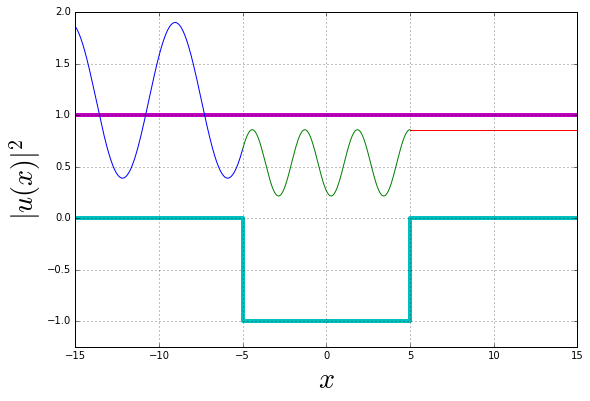

In [29]:
a0 = 5    # [-a, +a] kuyunun sınırları
xoo = 15  # x uzayının pratik sonsuzu
En0 = 1   # parçacığın gelme enerjisi
V_00 = 1  # kuyunun derinliği
nx = 250 # x uzayının bölünme (dx'lerin) sayısı 

prms = {En:En0, V_0:V_00, a:a0, hbar:1, m:1}
xnp1 = np.linspace(-xoo, -a0, nx)
xnp2 = np.linspace(-a0, a0, nx)
xnp3 = np.linspace(a0, xoo, nx)

u1re = re(u1e.subs(prms))**2 + im(u1e.subs(prms))**2
u1np = lambdify(x, u1re)

u2re = re(u2e.subs(prms))**2 + im(u2e.subs(prms))**2
u2np = lambdify(x, u2re)

u3re = re(u3e.subs(prms))**2 + im(u3e.subs(prms))**2
u3np = lambdify(x, u3re)

# çizimin büyüklüğü
plt.figure(figsize=(9, 6))

# dalga fonksiyonlarını
plt.plot(xnp1, np.real(u1np(xnp1)))
plt.plot(xnp2, np.real(u2np(xnp2)))
plt.plot(xnp3, np.real(u3np(xnp3)))

# kuyu
plt.plot([-xoo, -a0, -a0, a0, a0, xoo], [0, 0, -V_00, -V_00, 0, 0], lw=4, zorder=-999)

# enerji
plt.plot([-xoo, xoo], [En0, En0], lw=4, zorder=-999)


plt.xlabel("$x$", fontsize=28)
plt.ylabel("$|u(x)|^2$", fontsize=28)
plt.ylim(-V_00*1.25, En0+V_00)
plt.grid()
plt.show()